# Analysis & Visualisations for the Sinking of RMS Titanic in 1912 

This project uses a dataset of the passengers on the ill fated RMS Titanic that assembles some personal details with records of their fate.  The dataset is located at Kaggle at https://www.kaggle.com/pavlofesenko/titanic-extended  The dataset has been extended to include additional information from wikipedia.

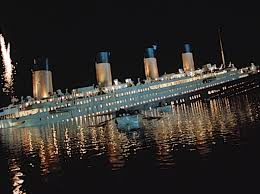

## Downloading the Dataset

The criteria for a dataset to be used in this exercise is that it has at least 3 columns (or features) and 150 rows (or records).  The dataset used is from OpenML and has 20 features and 1300 records.

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.  The dataset was downloaded from Kaggle and saved in the local directory for this project.  The file name given was TitanicFullDataSet.csv

The dataset includes the following:

Passenger ID : A seemingly unique number assigned to each passenger

Survived : A binary indicator of survival (0 = died, 1 = survived)

Pclass : A proxy for socio-economic status (1 = upper, 3 = lower)

Name : Passenger’s Name. For wedded women, her husband’s name appears first and her maiden name appears in parentheses

Sex : General indication of passenger’s sex

Age : Age of passenger (or approximate age). Passengers under the age of 1 year have fractional ages

SibSp : A count of the passenger’s siblings or spouses aboard

Parch : A count of the passenger’s parents or siblings aboard

Ticket : The number printed on the ticket. The numbering system is not immediately apparent

Fare : The price for the ticket (presumably in pounds, shillings, and pennies)

Cabin : Cabin number occupied by the passenger (this field is quite empty)

Embarked : The port from which the passenger boarded the ship

Dataset : Whether this particular row was a part of the training or testing dataset

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/pavlofesenko/titanic-extended'
od.download('https://www.kaggle.com/pavlofesenko/titanic-extended')

Kaggle dataset ID:  pavlofesenko/titanic-extended
Using downloaded and verified file: ./titanic-extended.zip
Extracting archive ./titanic-extended.zip to ./titanic-extended


In [ ]:
dataset_url = './titanic-extended/full.csv'

In [ ]:
data_dir = './titanic-extended'

In [ ]:
import os
os.listdir(data_dir)

['train.csv', 'full.csv', 'test.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "zerotopandas-course-project-starter" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project = project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/alanwarr/zerotopandas-course-project-starter


'https://jovian.ml/alanwarr/zerotopandas-course-project-starter'

## Data Preparation and Cleaning

In this section the csv file is used to create a data frame.  The shape of the dataframe is determined along with the number of missing values.

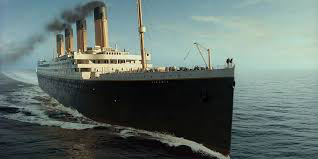

In [ ]:
import pandas as pd

In [ ]:
titanic_full_df = pd.read_csv(dataset_url)

In [ ]:
titanic_full_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [ ]:
titanic_full_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [ ]:
titanic_full_df.shape

(1309, 21)

In [ ]:
titanic_full_df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
WikiId         float64
Name_wiki       object
Age_wiki       float64
Hometown        object
Boarded         object
Destination     object
Lifeboat        object
Body            object
Class          float64
dtype: object

In [ ]:
titanic_full_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

In [ ]:
import jovian

In [ ]:
jovian.commit(project = project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/alanwarr/zerotopandas-course-project-starter


'https://jovian.ml/alanwarr/zerotopandas-course-project-starter'

## Exploratory Analysis and Visualization

In this section we explore the data generally.  We are initially looking to understand the dataset, then look for relationships in the data and from that we focus on age and gender as a factor in survival.

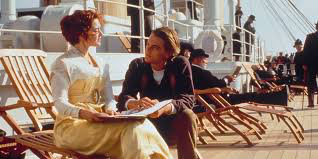

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [123]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Quick exploration of the columns along with the means, range, min and max for numerical columns 

In [124]:
titanic_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [125]:
titanic_full_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


### Plot of the Age Distribution of the Passengers and Crew

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


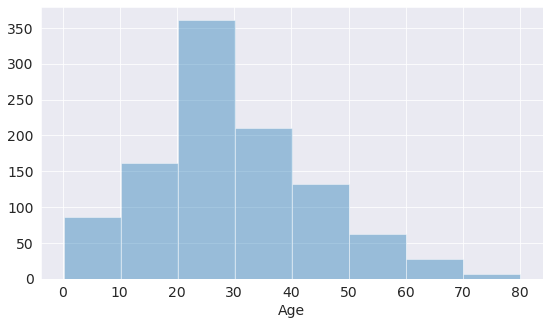

In [126]:
sns.distplot(titanic_full_df['Age'],kde=False, bins = 8)
plt.show()

### Plot of the Age Distribution  of the Survivors

In [127]:
titanic_survivors_df = titanic_full_df[titanic_full_df.Survived < 1]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


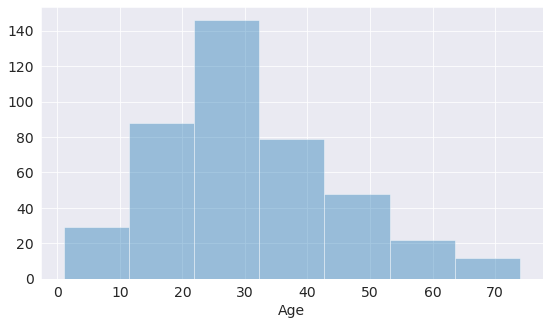

In [129]:
sns.distplot(titanic_survivors_df['Age'],kde=False, bins = 7)
plt.show()

### Plot of the Age Distribution of the Deceased

In [130]:
titanic_deceased_df = titanic_full_df[titanic_full_df.Survived > 0]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


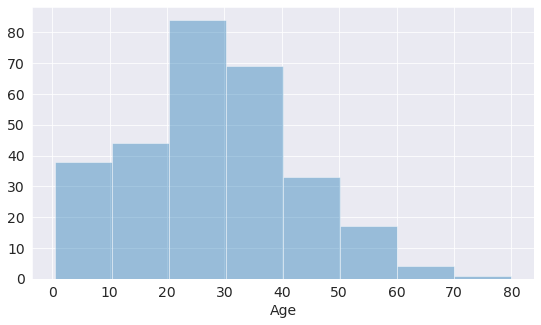

In [131]:
sns.distplot(titanic_deceased_df['Age'],kde=False, bins = 8)
plt.show()

### Pairplot of Survivors and Deceased to Look for Relationships and Patterns

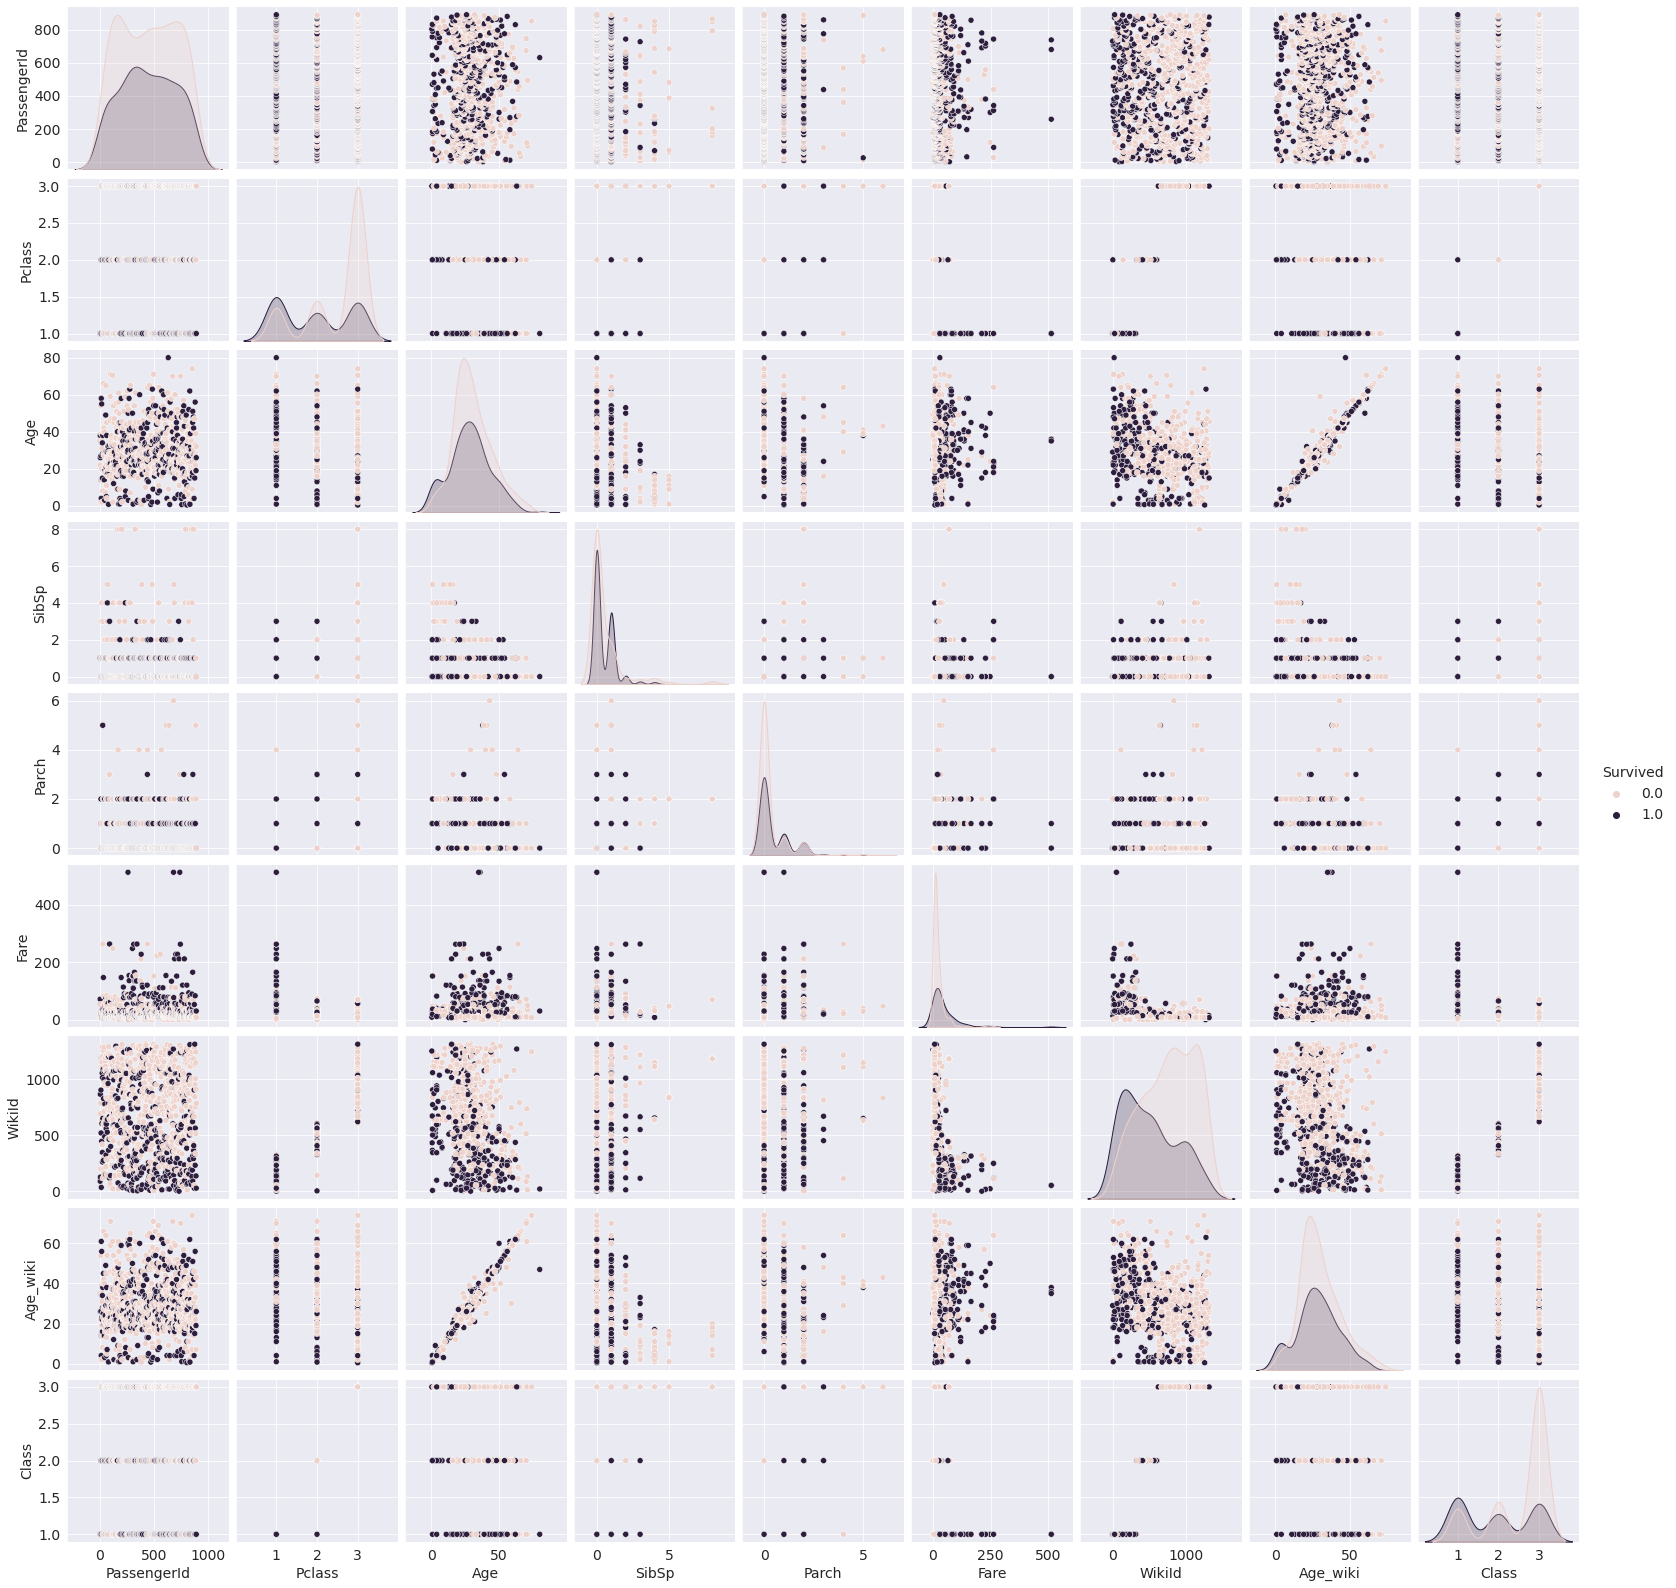

In [132]:
sns.pairplot(titanic_full_df, hue = 'Survived')
plt.show()

In [134]:
print(titanic_full_df.corr())

             PassengerId  Survived    Pclass  ...    WikiId  Age_wiki     Class
PassengerId     1.000000 -0.005007 -0.038354  ... -0.043806  0.024029 -0.039851
Survived       -0.005007  1.000000 -0.338481  ... -0.330473 -0.049798 -0.341829
Pclass         -0.038354 -0.338481  1.000000  ...  0.896469 -0.421088  0.997294
Age             0.028814 -0.077221 -0.408106  ... -0.343706  0.976244 -0.406132
SibSp          -0.055224 -0.035322  0.060832  ...  0.064071 -0.248726  0.062120
Parch           0.008942  0.081629  0.018322  ...  0.000669 -0.122975  0.020035
Fare            0.031428  0.257307 -0.558629  ... -0.476789  0.187654 -0.552864
WikiId         -0.043806 -0.330473  0.896469  ...  1.000000 -0.348818  0.899477
Age_wiki        0.024029 -0.049798 -0.421088  ... -0.348818  1.000000 -0.417871
Class          -0.039851 -0.341829  0.997294  ...  0.899477 -0.417871  1.000000

[10 rows x 10 columns]


Note that for most pairplots there is no obvious correlations.  Except for 'Survived' and 'Passenger Class' / 'Fare'.  Suggesting there is a relationship between surving and being first or second class rather than third class passenger.  Som columns are not included because they do not have integers in their data.  These may be important nevertheless like gender ('Sex').

### Using a Swarm Plot to Explore the Role of Gender Visually

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2989: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


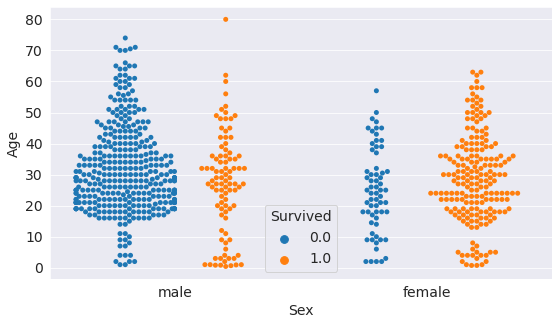

In [ ]:
data = titanic_full_df
sns.swarmplot(x='Sex',y='Age',data=data,hue='Survived',split=True)
plt.show()

The swarm plot confirms that gender is playing an important role in surviving the Titanic's sinking.

Let us save and upload our work to Jovian before continuing

In [135]:
import jovian

In [136]:
jovian.commit(project = project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/alanwarr/zerotopandas-course-project-starter


'https://jovian.ml/alanwarr/zerotopandas-course-project-starter'

## Asking and Answering Questions

In this section we ask some explicit questions aiming to drill down on the general observations from the previous section.

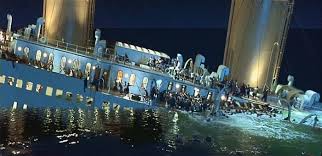

### Question 1:  How many people were on the Titanic and how many survived?

In [137]:
NumberOfPassengers = titanic_full_df['PassengerId'].count()
NumberOfSurvivors = titanic_full_df['Survived'].count()
PercentageOfSurvivors = (NumberOfSurvivors/NumberOfPassengers) * 100

In [138]:
print('Passengers were ' + str(NumberOfPassengers))
print('Survivors were ' + str(NumberOfSurvivors))
print('Percentage of survivors was ' + str(PercentageOfSurvivors) + ' %')

Passengers were 1309
Survivors were 891
Percentage of survivors was 68.0672268907563 %


### Question 2: What factors significantly correlate with survival?

In [139]:
print(titanic_full_df.corr())

             PassengerId  Survived    Pclass  ...    WikiId  Age_wiki     Class
PassengerId     1.000000 -0.005007 -0.038354  ... -0.043806  0.024029 -0.039851
Survived       -0.005007  1.000000 -0.338481  ... -0.330473 -0.049798 -0.341829
Pclass         -0.038354 -0.338481  1.000000  ...  0.896469 -0.421088  0.997294
Age             0.028814 -0.077221 -0.408106  ... -0.343706  0.976244 -0.406132
SibSp          -0.055224 -0.035322  0.060832  ...  0.064071 -0.248726  0.062120
Parch           0.008942  0.081629  0.018322  ...  0.000669 -0.122975  0.020035
Fare            0.031428  0.257307 -0.558629  ... -0.476789  0.187654 -0.552864
WikiId         -0.043806 -0.330473  0.896469  ...  1.000000 -0.348818  0.899477
Age_wiki        0.024029 -0.049798 -0.421088  ... -0.348818  1.000000 -0.417871
Class          -0.039851 -0.341829  0.997294  ...  0.899477 -0.417871  1.000000

[10 rows x 10 columns]


#### Question 3: Was the principle of 'women and children first' adopted?

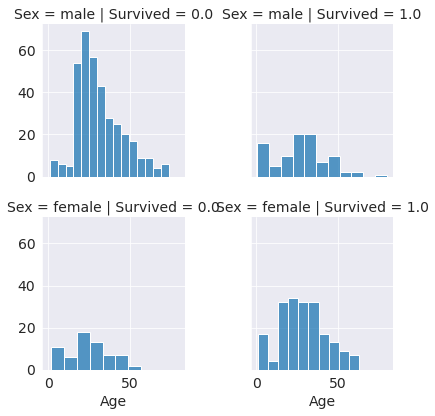

In [ ]:
data = titanic_full_df
grid = sns.FacetGrid(data=data, col='Survived', row = 'Sex')
grid.map(sns.histplot,'Age')
plt.show()

This visualisation shows that being female has an increased likelihood of survival, but many women nevertheless perished.  Suggesting perhaps that the women first principle was applied but not effectively.  When it comes to children it again seems that more survived but the principle again was not applied effectively as many nevertheless perished.

#### Question 4: Did rich passengers have more chance of survival

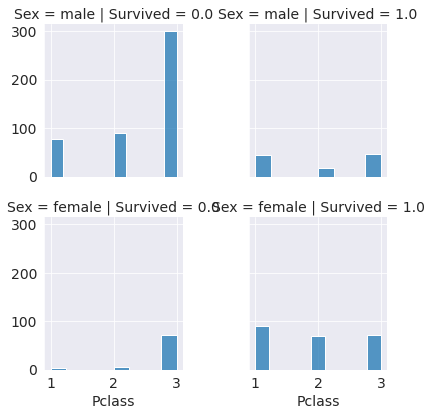

In [ ]:
data = titanic_full_df
grid = sns.FacetGrid(data=data,col='Survived', row = 'Sex')
grid.map(sns.histplot,'Pclass')
plt.show()

Survival rates amongst 3rd class passengers are much worse than amongst first or second class passengers.  Showing that money and privilege played a significant role in the access to the means of survival.  This was most stark where for females with very few 1st and 2nd class female's perishing.

#### Question 5: Did rich children have more chance of survival

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2989: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


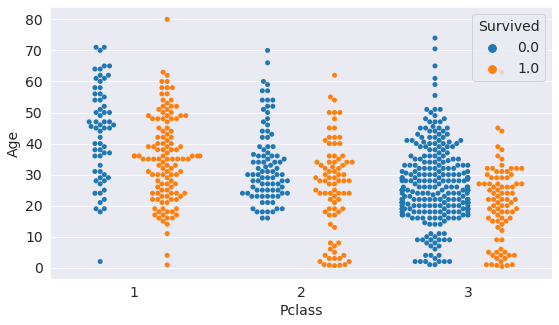

In [ ]:
data = titanic_full_df
sns.swarmplot(x='Pclass',y='Age',data=data,hue='Survived',split=True)
plt.show()

This shows that children of 1st and 2nd class passengers almost all survived.  But that was not the case for 3rd class passengers.

Let us save and upload our work to Jovian before continuing.

In [140]:
import jovian

In [141]:
jovian.commit(project = project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/alanwarr/zerotopandas-course-project-starter


'https://jovian.ml/alanwarr/zerotopandas-course-project-starter'

## Inferences and Conclusion

In this section we can draw some conclusions and suggest some further evidence or data that could help us reveal more as to what occurred on that fateful night.

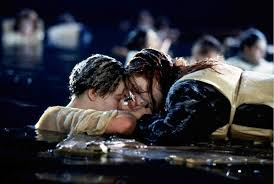

A set of broad conclusions would include:

*   Of the 1309 passenger only 418 survived the sinking of the TitanicList item
*   The survival rates were higher amongst 1st and 2nd class passengers particularly amongst females.  Wealth and privilege appear from the data to have played a significant role on the night.
*   Although the survival rates for males clearly suggest that a "women and children" first policy was applied this was most effective for 1st and 2nd class passengers.  Third class passengers experienced significantly higher losses of both women and children.  The partial application of the policy of women and children first may have been down to its implementation rather than the intentions of passengers and crew, with it not being effective in the confusion on the night.  





In [142]:
import jovian

In [143]:
jovian.commit(project = project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/alanwarr/zerotopandas-course-project-starter


'https://jovian.ml/alanwarr/zerotopandas-course-project-starter'

## References and Future Work

Burns, S. (2019) "Python Data Visualisation: An Easy Introduction to Data Visualisation in Python", Amazon Publishing.

VanderPlas, J. (2017) "Python Data Sciences Handbook", O'Reilley Books, California.

In [144]:
import jovian

In [146]:
jovian.commit(project = project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/alanwarr/zerotopandas-course-project-starter


'https://jovian.ml/alanwarr/zerotopandas-course-project-starter'